In [ ]:
!pip install nltk
!pip install --upgrade nltk
!pip install wordcloud
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


In [ ]:
#Upload data set 
from google.colab import files
uploaded = files.upload()

Saving reddit_posts.csv to reddit_posts.csv


In [ ]:
#Machine learning libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Text cleaning library
import nltk

#Load data set
import io
df = pd.read_csv(io.BytesIO(uploaded['reddit_posts.csv']))


# **Exploring the data set**






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15214 entries, 0 to 15213
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          15214 non-null  object
 1   title       15214 non-null  object
 2   post        15214 non-null  object
 3   class_name  15214 non-null  object
 4   class_id    15214 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 594.4+ KB


In [ ]:
df.head(5)

NameError: ignored

In [ ]:
# Rename columns
df.rename(columns = {'title':'post_title' , 'class_name' : 'disorder' , 'class_id' : 'disorder_no'  }, inplace = True)

In [ ]:
# Checking the total number of null values of each feature
df.isnull().sum()

ID             0
post_title     0
post           0
disorder       0
disorder_no    0
dtype: int64

In [ ]:
# Find unique values 
df.disorder.unique()

array(['none', 'adhd', 'depression', 'ptsd', 'anxiety', 'bipolar'],
      dtype=object)

# **Possible disorders values** (from 15,214 reddit posts)
None / ADHD / Depression / PTSD / Anxiety / Bipolar disorder

***Sorted according to Disorder ID***

0=   ADHD 

1=   Anxiety

2=   Bipolar disorder

3=   Depression

4=   PTSD

5=   None










In [ ]:
df.head()

,ID,post_title,post,disorder,disorder_no
0,691324c4-5c30-44e0-b9e4-45b4f0715e21,a question about the third conditional.,i was making questions for my students and i r...,none,5
1,d4295391-9ca5-4398-b7c8-687e4a984ef1,the epitome of my life,i've recently requested testing accommodations...,adhd,0
2,58937fa5-3c2c-426b-8255-5a140fbab675,what are your favourites offbeat destinations ...,**cambodia** * koh rong: amazing beaches and a...,none,5
3,7daf364c-3b33-4cbe-be37-a214edf9a73e,synesthesia survey (what colour is each month ...,synesthesia. what is synesthesia? according to...,none,5
4,22518271-4bb4-4caf-b683-7305da519288,"science ama series: i’m phil baran, and i’m he...",i’m phil baran and i teach organic chemistry a...,none,5


# **Text pre-processing**


In [ ]:
 # 1- Lower case post text and remove any digits

df['post'] = df['post'].apply(lambda posts : re.sub(r"[0-9]", " ", posts.lower()))
df['post']

0        i was making questions for my students and i r...
1        i've recently requested testing accommodations...
2        **cambodia** * koh rong: amazing beaches and a...
3        synesthesia. what is synesthesia? according to...
4        i’m phil baran and i teach organic chemistry a...
                               ...                        
15209    i quit my job early this year and moved back t...
15210    there are lots of trolls trying to create a di...
15211    &amp;#x   b; rawg is the largest video game da...
15212    hi reddit! i’m [dr. john m. and i serve as ceo...
15213    hi, my name is daði freyr. i make music, mostl...
Name: post, Length: 15214, dtype: object

In [ ]:
# 2- Remove punctuation marks by tokenization

# Split text into tokens
from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df['post'] = df['post'].apply(lambda x: tokenizer.tokenize(x))
df['post']

# Remove punctuation
import string

df['post'] = df['post'].apply(lambda x : list(filter(None,[word.replace('.', '').replace('_','').replace('-','').replace("'","" ).replace("`","").replace('*','') for word in x if word not in string.punctuation])))

df['post']

0        [i, was, making, questions, for, my, students,...
1        [i, ve, recently, requested, testing, accommod...
2        [cambodia, koh, rong, amazing, beaches, and, a...
3        [synesthesia, what, is, synesthesia, according...
4        [i’m, phil, baran, and, i, teach, organic, che...
                               ...                        
15209    [i, quit, my, job, early, this, year, and, mov...
15210    [there, are, lots, of, trolls, trying, to, cre...
15211    [amp, x, b, rawg, is, the, largest, video, gam...
15212    [hi, reddit, i’m, dr, john, m, and, i, serve, ...
15213    [hi, my, name, is, daði, freyr, i, make, music...
Name: post, Length: 15214, dtype: object

In [ ]:
 # 3- Remove stop words (All english stop words)

#import all english stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Handle negations to avoid destroying sentence meaning (remove from stopword list)

negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
stop_words

# Removing stopwords from "post" Column

df['post'] = df['post'].apply(lambda x: [word for word in x if word not in stop_words])
df['post'].tolist()
df['post']

In [ ]:
# 4- Transforming words into their root (Stemming)  ex: 'studies → study / studying → study'
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

df['post'] = df['post'].apply(lambda x: [stemmer.stem(word) for word in x])

df['post']

In [ ]:
# 5- Remove elongated words (Lemmatization)  ex: 'issssss ----> is'
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['post'] = df['post'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df['post']

In [ ]:
# Join all words in a post into a string

df['post']= df['post'].apply(lambda x : " ".join(x))
df['post']

# **Data visualization**

[Text(0, 0, '2229'),
 Text(0, 0, '2249'),
 Text(0, 0, '2655'),
 Text(0, 0, '2670'),
 Text(0, 0, '2698'),
 Text(0, 0, '2713')]

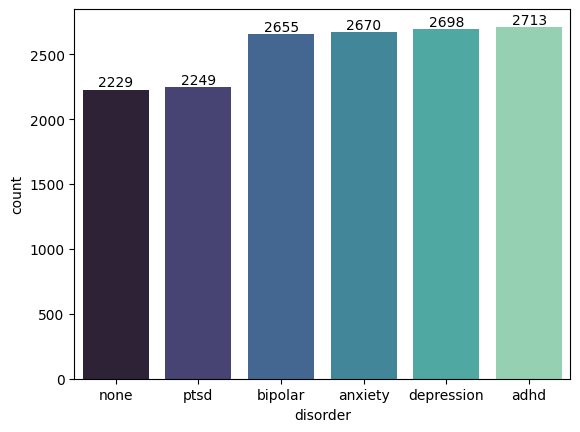

In [ ]:
# Occurences of each disorder
ax = sns.countplot(x = 'disorder', data = df, order=df['disorder'].value_counts(ascending=True).index, palette = 'mako')
ax.bar_label(ax.containers[0])


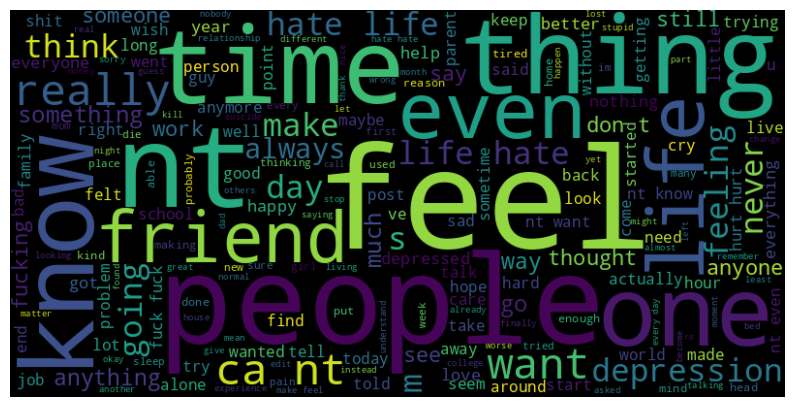

In [ ]:
#Word cloud for depression

# Filter the DataFrame based on a specific attribute value
attribute_value = "disorder"
filtered_df = df[df["disorder"] == 'depression']

# Concatenate the text data into a single string
text = " ".join(filtered_df["post"])

# Create the word cloud
wordcloud = WordCloud(min_font_size=3, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

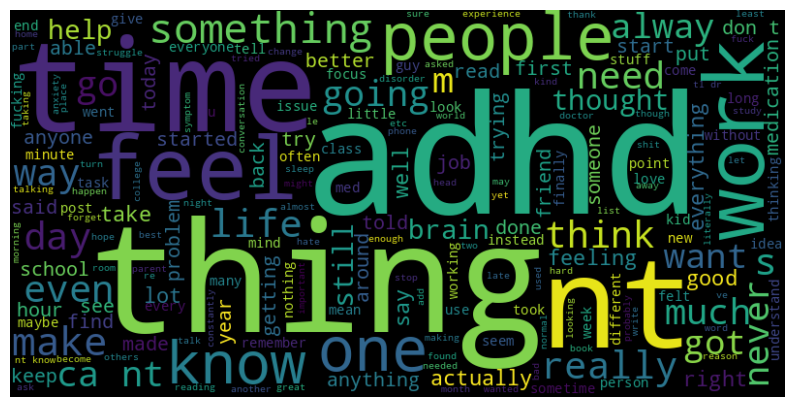

In [ ]:
#Word cloud for ADHD

# Filter the DataFrame based on a specific attribute value
attribute_value = "disorder"
filtered_df = df[df["disorder"] == 'adhd']

# Concatenate the text data into a single string
text = " ".join(filtered_df["post"])

# Create the word cloud
wordcloud = WordCloud(min_font_size=3, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

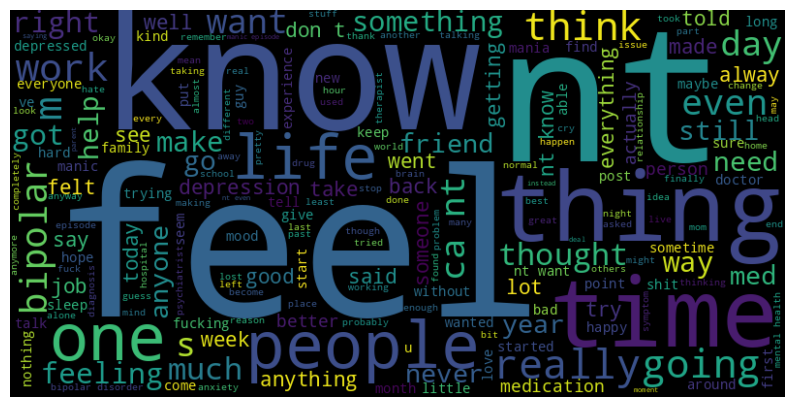

In [ ]:

#Word cloud for Bipolar disorder

# Filter the DataFrame based on a specific attribute value
attribute_value = "disorder"
filtered_df = df[df["disorder"] == 'bipolar']

# Concatenate the text data into a single string
text = " ".join(filtered_df["post"])

# Create the word cloud
wordcloud = WordCloud(min_font_size=3, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

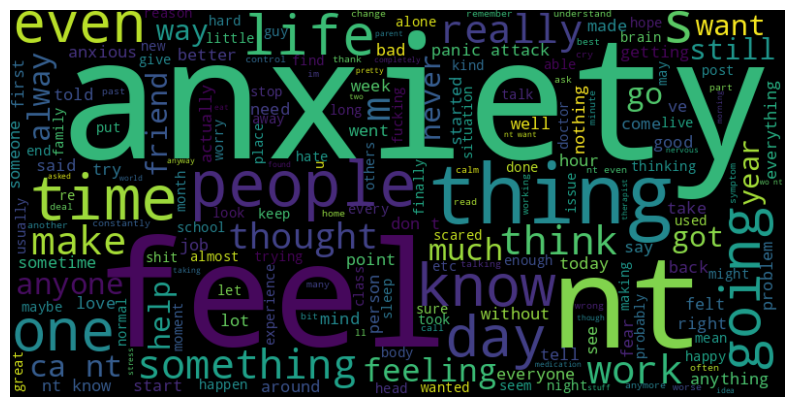

In [ ]:
#Word cloud for Anxiety

# Filter the DataFrame based on a specific attribute value
attribute_value = "disorder"
filtered_df = df[df["disorder"] == 'anxiety']

# Concatenate the text data into a single string
text = " ".join(filtered_df["post"])

# Create the word cloud
wordcloud = WordCloud(min_font_size=3, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

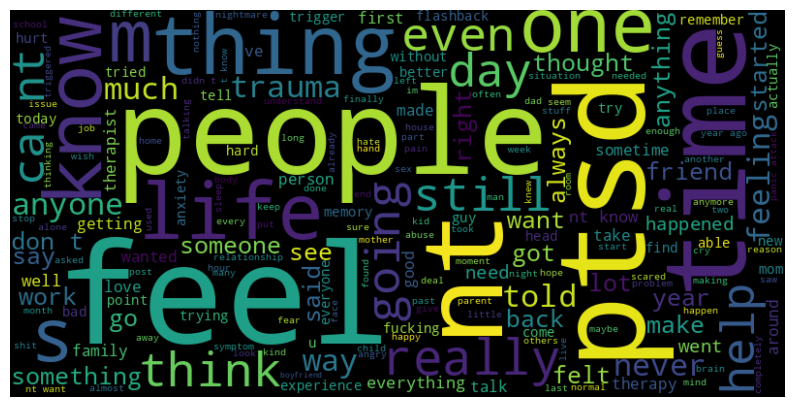

In [ ]:
#Word cloud for PTSD

# Filter the DataFrame based on a specific attribute value
attribute_value = "disorder"
filtered_df = df[df["disorder"] == 'ptsd']

# Concatenate the text data into a single string
text = " ".join(filtered_df["post"])

# Create the word cloud
wordcloud = WordCloud(min_font_size=3, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

# **Modeling** 
(Linear Support vector machine / Logistic regression / Naive bayes / Random forests)

In [ ]:
#Split data into training and testing 
# Total posts = 15,214
# 90% training (13,726)  
# 10% testing (1,488)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

X = df['post']            #Independent Variable
y = df['disorder']        #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
#Encode post data using bag of words approach 
from nltk import ngrams

count_vect = CountVectorizer(max_features= 1000, ngram_range=(1,3))

x_train_post = count_vect.fit_transform(x_train) #transformed train reviews

x_test_post = count_vect.transform(x_test) #transformed test reviews

print('BOW_train:', x_train_post.shape)
print('BOW_test:', x_test_post.shape)

BOW_train: (13692, 1000)
BOW_test: (1522, 1000)


In [ ]:
#Define classifiers
rf_clf = RandomForestClassifier(random_state=42)
svc_clf = LinearSVC(C=10)
lr_clf = LogisticRegression(C=10)
nb_clf = MultinomialNB(alpha=1)


In [ ]:
# Define the parameter grids for each classifier
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 20]}
svc_param_grid = {'C': [0.1, 1, 10]}
lr_param_grid = {'C': [0.1, 1, 10]}
nb_param_grid = {'alpha': [0.1, 1, 10]}

In [ ]:
# Support vector classifier
svc_param_grid = {'C': [0.1, 1, 10]}
svc_grid = GridSearchCV(svc_clf, svc_param_grid, cv=5)

In [ ]:
# Logistic regression classifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train_post)
x_test_scaled = scaler.transform(x_test_post)

lr_grid = GridSearchCV(lr_clf, lr_param_grid, cv=5)


In [ ]:
# Naive Bayes classifier
nb_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
nb_grid = GridSearchCV(nb_clf, nb_param_grid, cv=5)

In [ ]:
#Random forests classifier
from sklearn.ensemble import RandomForestClassifier
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)

In [ ]:
# Fit the models
rf_clf.fit(x_train_post, y_train)
svc_clf.fit(x_train_post, y_train)
lr_clf.fit(x_train_post, y_train)
nb_clf.fit(x_train_post, y_train)

MultinomialNB(alpha=1)

In [ ]:
# Predict with the models
rf_y_pred = rf_clf.predict(x_test_post)
svc_y_pred = svc_clf.predict(x_test_post)
lr_y_pred = lr_clf.predict(x_test_post)
nb_y_pred = nb_clf.predict(x_test_post)

# **Evaluation**

In [ ]:
classifiers = [('Random forests', rf_y_pred), ('Linear SVC', svc_y_pred), ('Logistic Regression', lr_y_pred), ('Naive Bayes', nb_y_pred)]
for clf in classifiers:
  print('Classifier:', clf[0]) 
  print('Accuracy:', accuracy_score(y_test, clf[1]))
  print('F1 Score:', f1_score(y_test, clf[1], average='weighted'))

Classifier: Random forests
Accuracy: 0.7398160315374507
F1 Score: 0.7417606713676739
Classifier: Linear SVC
Accuracy: 0.7247043363994744
F1 Score: 0.7265551180202685
Classifier: Logistic Regression
Accuracy: 0.7063074901445466
F1 Score: 0.7067968127767758
Classifier: Naive Bayes
Accuracy: 0.7247043363994744
F1 Score: 0.7257309658559854


NameError: ignored

# Report

NameError: ignored

In [ ]:
# Print the classification report for each model
print('Random forest classifier\n', classification_report(y_test, rf_y_pred))
print('Linear SVC classifier\n', classification_report(y_test, svc_y_pred))
print('Logistic Regression Classifier\n', classification_report(y_test, lr_y_pred))
print('Naive Bayes Classifier\n', classification_report(y_test, nb_y_pred))